 # Investigating Fandango Movie Ratings
 
 ## Introduction:
 
Fandango is an online movie ratings aggregator. A data journalist named Walt Hickey analyzed the ratings data and found strong evidence to say that Fandango's rating system was biased and dishonest.

Due to the Fandango's rating system biased rounding off the rating, the distribution of Fandango's movie ratings are right skewed than the actual ratings.

## Goal:

We'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


### Import Data

In [5]:
import pandas as pd
fandango = pd.read_csv('fandango_score_comparison.csv')
movie_1617 = pd.read_csv('movie_ratings_16_17.csv')

In [6]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [7]:
movie_1617.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [8]:
previous = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [9]:
after = movie_1617[['movie','year','fandango']]

In [10]:
previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [11]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal of the analysis is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. Hence, the population of interest is **all the movie ratings stored on Fandango's website regardless of releasing year.**

To acheive our goal, we want to sample the data previous and after Hickey's analysis. 

From our data source: [previous](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [after](https://github.com/mircealex/Movie_ratings_2016_17)

The critics about the two periods of data are as following:

**Previous:**

- The data was selected must have at least 30 Fan reviews on Fandango and the data was pulled on Aug. 24, 2015
- he movie must have had tickets on sale in 2015

**After**

- The data contains movie ratings data for 214 of the most popular movies
- The movie must released after 2016

We conclude that the sampling is not random because not every movie has equal chance to be included in the two samples  (like those having under 30 fan ratings or those without tickets on sale in 2015). Hence, the resulting samples are very unlikely to be representative of the population we're interested in describing. Therefore, these datasets can't really help to achieve our goal.

## Change the current goal

So far we can either collecting new datas or we can slightly change our goal. We choose to put some limitation on our initial goal.

Our new goal is to determine **whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.** This should be fairly good proxy for our initial goal.

## Isolation sample for our population of interest
We have have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

We'll use the description from the data source to define **popular**: movies that at least have 30 fan reviews on Fandango. 

In [18]:
#double check if there are any movies with less than 30 votes 
sum(previous.Fandango_votes<30) 

0

Since we are now only interested in year 2015 and 2016, we need to isolate only the movies released in 2015 and 2016.

In [25]:
previous['Year'] = previous['FILM'].str[-5:-1]
previous['Year'].value_counts()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2015    129
2014     17
Name: Year, dtype: int64

In [32]:
#Select datas from year 2015 from previous 
previous_new = previous[previous.Year == '2015'].copy()
previous_new.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [31]:
after.year.value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [37]:
after_new = after[after.year == 2016].copy()
after_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparison of the Distribution between 2015 and 2016

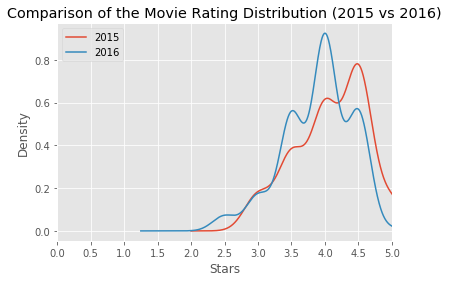

In [45]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('ggplot')

previous_new['Fandango_Stars'].plot.kde(label='2015', legend=True)
after_new['fandango'].plot.kde(label='2016', legend=True)

plt.title('Comparison of the Movie Rating Distribution (2015 vs 2016)')
plt.xlim(0,5)
plt.xlabel('Stars')
plt.xticks(arange(0,5.5,.5)) #movie ratings are between 0 and 5 stars
plt.show()                                      

From the graph, we observe that the rating distribution for both years are strongly left skewed, meaning that the popular movies mostly receive high ratings. 
Comparing to the shape of 2015,the shape of 2016 slightly shift to the left which means the ratings from 2016 are slightly lower than 2015. This suggests there is indeed a difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

## Comparing Frequency Distribution

Next, let's examine the frequency table for both years. Because there are different numbers of movies, we will normalize the frequency table into percentage.

In [48]:
previous_new['Fandango_Stars'].value_counts(normalize=True).sort_index()*100
#2015

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [49]:
after_new['fandango'].value_counts(normalize=True).sort_index()*100
#2016

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, high ratings (4.5 and 5 stars) had significantly lower percentages than 2015. In 2016, less than 1% of movies had 5 stars while about 7% movies had 5 stars in 2015. There were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

There is a clear difference between the two frequency distributions. The minimum rating in 2016 is 2.5 while it is 3.0 in 2015.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determine the Direction of Difference

In [64]:
#Compute the summary statistics for both distribution
p_mean=previous_new['Fandango_Stars'].mean()
p_median=previous_new['Fandango_Stars'].median()
p_mode=previous_new['Fandango_Stars'].mode()[0]

a_mean=after_new['fandango'].mean()
a_median=after_new['fandango'].median()
a_mode=after_new['fandango'].mode()[0]

summary=pd.DataFrame()
summary['2015'] = [p_mean,p_median,p_mode]
summary['2016'] = [a_mean,a_median,a_mode]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


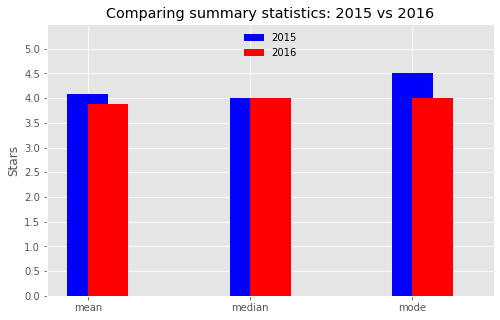

In [69]:
plt.style.use('ggplot')
summary['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Mean: 2016 is lower than 2015 about 5%.

Median: 2015 and 2016 are almost the same.

Mode: 2016 is lower than 2015 by 0.5 stars.

Hence, the direction of the difference we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.